# Определение перспективного тарифа для  компании «Мегалайн» — федерального оператора сотовой связи

**Цель**: Определить выгодный тарифный план для корректировки рекламного бюджета.

**Выборка**. Данные 500 пользователей тарифных планов «Смарт» и «Ультра»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Примечание**: «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт:

* Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 
* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [1]:
# Необходимые библиотеки для исследования 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [2]:
## Предобработка данных# Загрузка файлов

df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
df_tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

## Общая информаци о данных

- Пропуски
- Дубликаты
- Типы данных

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


В таблице с информацией о звонках пропусков нет. Проверим данные на наличие дубликатов.

In [5]:
df_calls.duplicated().sum()# подсчёт явных дубликатов

0

Явные дубликаты отсутсвуют.

In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950,2018-11-25,1000
1,1,1000_1,1052.810,2018-09-07,1000
2,2,1000_2,1197.260,2018-06-25,1000
3,3,1000_3,550.270,2018-08-22,1000
4,4,1000_4,302.560,2018-09-24,1000


В таблице с информацией об интернет-сессиях пропусков нет. Проверим данные на наличие дубликатов.

In [8]:
df_internet.duplicated().sum()# подсчёт явных дубликатов

0

Явные дубликаты отсутсвуют.

In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице с информацией о сообщениях пропусков нет. Проверим данные на наличие дубликатов.

In [11]:
df_messages.duplicated().sum()# подсчёт явных дубликатов

0

Явные дубликаты отсутсвуют.

In [12]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице с информацией о пользователях 462 пропуска. Проверим данные на наличие дубликатов.

In [16]:
df_users.duplicated().sum()# подсчёт явных дубликатов

0

Явные дубликаты отсутсвуют.

***Выводы***

В результате превичного анализа данных таблиц устновлено следующее:
-  для таблицы calls (информация о звонках) необходимо:
    * перевести даты из объектного типа в тип datetime64;
    * добавить столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12;
    * добавить столбец с началом календарного месяца;
    * округлить длительность звонков и изменить тип данных на целочисленный.
    
-  для таблицы internet (информация об интернет-сессиях) необходимо:
    * перевести даты из объектного типа в тип datetime64.
    * добавить столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12;
    * добавить столбец с началом календарного месяца.
    
- для таблицы messages (информация о сообщениях) необходимо:
    * перевести даты из объектного типа в тип datetime64.
    * добавить столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12;
    * добавить столбец с началом календарного месяца.
    
- для таблицы users (информация о пользователях) необходимо:
    * перевести даты из объектного типа в тип datetime64.

Следует отметить, что в таблице calls (информация о звонках) содержатся записи о звонках с нулевой продолжительностью. Согалсно документации к данным то не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
В таблице internet (информация об интернет-сессиях) также содержатся записи о звонках с нулевой продолжительностью. Вероятно пользователи не использовали мобильный интернет. Возможно есть проблема с выгрузкой и про это стоит создать тикет человеку, который эти данные формировал. Но, предварительно, эти данные для анализа нам нужны и мы не сможем их заменить другими значениями.

## Предобработка данных

### Таблица calls (информация о звонках)

In [17]:
# перевод даты из объектного типа в тип datetime64
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_calls['month_num'] = pd.DatetimeIndex(df_calls['call_date']).month

# добавляем столбец с началом календарного месяца
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')

# округляем длительность звонков и меняем тип данных на целочисленный
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [18]:
display(df_calls.head())

,id,call_date,duration,user_id,month_num,month
0,1000_0,2018-07-25,0,1000,7,2018-07-01
1,1000_1,2018-08-17,0,1000,8,2018-08-01
2,1000_2,2018-06-11,3,1000,6,2018-06-01
3,1000_3,2018-09-21,14,1000,9,2018-09-01
4,1000_4,2018-12-15,6,1000,12,2018-12-01


In [19]:
def hist_maker(column):
    print(column.describe())
    plt.figure(figsize=(10,6))
    plt.hist(column, bins=30, color='grey', edgecolor='grey', alpha=0.8)
    plt.axvline(column.describe()['mean'], color='r', linestyle='dashed', linewidth=3, label='Mean value: {:.2f}'.format(column.describe()['mean']))
    plt.axvline(column.describe()['50%'], color='b', linestyle='dotted', linewidth=3, label='Median value: {:.0f}'.format(column.describe()['50%']))
    plt.legend()
    plt.title('Histogramm {}'.format(column.name))

count   202607.000
mean         7.158
std          5.959
min          0.000
25%          2.000
50%          6.000
75%         11.000
max         38.000
Name: duration, dtype: float64


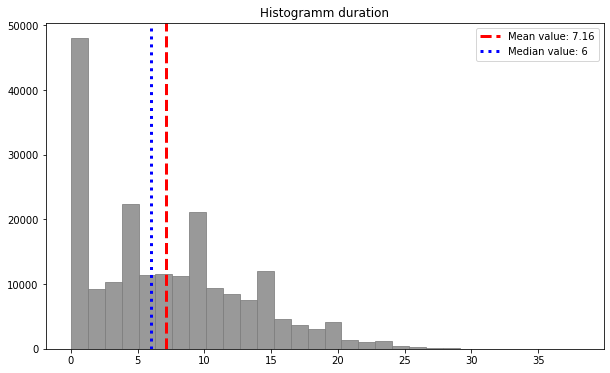

In [20]:
hist_maker(df_calls['duration'])

### Таблица  internet (информация об интернет-сессиях) 

In [21]:
# перевод даты из объектного типа в тип datetime64
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_internet['month_num'] = pd.DatetimeIndex(df_internet['session_date']).month

# добавляем столбец с началом календарного месяца
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')


In [22]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month_num,month
0,0,1000_0,112.950,2018-11-25,1000,11,2018-11-01
1,1,1000_1,1052.810,2018-09-07,1000,9,2018-09-01
2,2,1000_2,1197.260,2018-06-25,1000,6,2018-06-01
3,3,1000_3,550.270,2018-08-22,1000,8,2018-08-01
4,4,1000_4,302.560,2018-09-24,1000,9,2018-09-01


count   149396.000
mean       370.192
std        278.301
min          0.000
25%        138.188
50%        348.015
75%        559.553
max       1724.830
Name: mb_used, dtype: float64


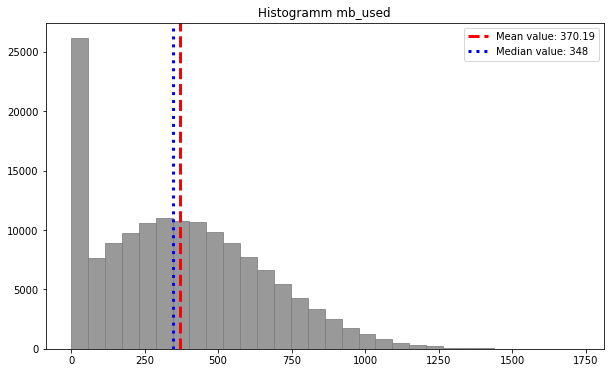

In [23]:
hist_maker(df_internet['mb_used'])

### Таблица  messages (информация о сообщениях) 

In [24]:
# перевод даты из объектного типа в тип datetime64
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'] , format='%Y-%m-%d')

# добавляем столбец с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12
df_messages['month_num'] = pd.DatetimeIndex(df_messages['message_date']).month

# добавляем столбец с началом календарного месяца
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

In [25]:
df_messages.head()

,id,message_date,user_id,month_num,month
0,1000_0,2018-06-27,1000,6,2018-06-01
1,1000_1,2018-10-08,1000,10,2018-10-01
2,1000_2,2018-08-04,1000,8,2018-08-01
3,1000_3,2018-06-16,1000,6,2018-06-01
4,1000_4,2018-12-05,1000,12,2018-12-01


count   2717.000
mean      45.284
std       35.051
min        1.000
25%       19.000
50%       38.000
75%       63.000
max      224.000
Name: messages, dtype: float64
Amount of clients used the service (messages): 426


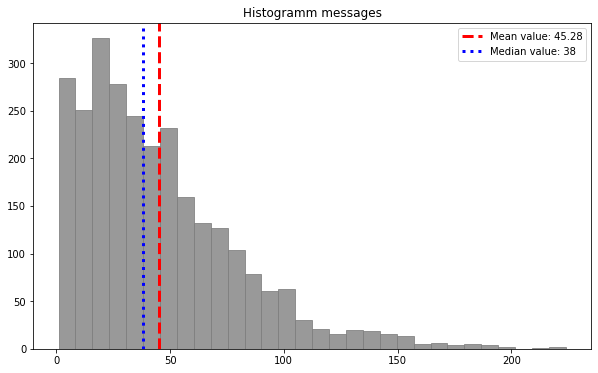

In [26]:
messages_count = df_messages.groupby(['user_id','month']).agg(
    messages = ('id', 'count')
).reset_index()

hist_maker(messages_count['messages'])
print('Amount of clients used the service (messages):',messages_count['user_id'].nunique())

### Таблица  users (информация о пользователях)

In [27]:
# перевод даты из объектного типа в тип datetime64
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'] , format='%Y-%m-%d')

***Выводы***

- Данные в таблицах преобразованы в соответствии с вышеуказанными требованиями. Для дальнейшего анализа данных в разрезе по месяцам в таблица с сведениями о звонках, сообщениях и интенет- сессиях добавлены столбцы  с категорией месяца: Январь - 1, Февраль - 2, ..., Декабрь - 12 и началом календарного месяца.

- На полученных графиках значения среднего и медианы отличаются несущественно, следовательно данные в таблицах вероятнее всего не содержат выбросов.

- Пики нулевых значений на гистограммах с длительностью звонков и интернет-сессиях связаны с пропущенными звонками и наличием фактов неиспользования мобильного интернета (обозначены в таблицах 0).

- Кроме того, гистограмма с количеством сообщений тоже свидетельствует о том, что не все пользователи тарифов используют текстовые сообщения.

Данная информация может быть использована в дальнейшем для принятий решений об изменениях условий действующих тарифов или при создании нового, учитывающего либо предпочтения клиентов, либо возможности для получения дополнительной прибыли сотового оператора.

### Расчеты агрегированных данных

**С помощью сводных таблиц рассчитаем необходимые параметры:**

Сгруппируем данные по user_id и month, применим методы к соответствующим значениям.

In [28]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
df_calls_pivot.columns = ['calls_count', 'calls_duration']
df_calls_pivot.head()

calls_count  calls_duration
user_id month                                  
1000    2018-05-01           22             159
        2018-06-01           43             172
        2018-07-01           47             340
        2018-08-01           52             408
        2018-09-01           58             466

In [29]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
df_messages_pivot.columns = ['messages_count']
df_messages_pivot.head()

messages_count
user_id month                     
1000    2018-05-01              22
        2018-06-01              60
        2018-07-01              75
        2018-08-01              81
        2018-09-01              57

In [30]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':sum})
df_internet_pivot.columns = ['traffic_volume']
df_internet_pivot.head()

traffic_volume
user_id month                     
1000    2018-05-01        2253.490
        2018-06-01       23233.770
        2018-07-01       14003.640
        2018-08-01       14055.930
        2018-09-01       14568.910

Для рассчета помесячной выручки объеденим все сводные таблицы и таблицу df_users.

In [31]:
# при помощи метода join объеденим сразу все сводные таблицы по индексам
# и сбросим индекс month для последующего объединения с df_users

df_cmi_pivot = df_internet_pivot.join([df_calls_pivot, df_messages_pivot], how='outer').reset_index(level='month')
df_cmi_pivot.head(2)

,month,traffic_volume,calls_count,calls_duration,messages_count
user_id,,,,,
1000,2018-05-01,2253.490,22.000,159.000,22.000
1000,2018-06-01,23233.770,43.000,172.000,60.000


In [32]:
# объединяем df_users и df_cmi_pivot также методом join
# параметру 'on' передаем значения df_users['user_id']
# метод join будет искать совпадения этих значений с индексами df_cmi_pivot и объединять по ним

df_cmiu_pivot = df_users.join(df_cmi_pivot, on='user_id')
df_cmiu_pivot.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2253.490,22.000,159.000,22.000
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-06-01,23233.770,43.000,172.000,60.000


In [33]:
# удалим столбцы, которые нам не пригодятся чтобы легче было ориентироваться в таблице

df_cmiu_pivot = df_cmiu_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')
df_cmiu_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,Краснодар,ultra,2018-05-01,2253.490,22.000,159.000,22.000
0,1000,52,Краснодар,ultra,2018-06-01,23233.770,43.000,172.000,60.000
0,1000,52,Краснодар,ultra,2018-07-01,14003.640,47.000,340.000,75.000
0,1000,52,Краснодар,ultra,2018-08-01,14055.930,52.000,408.000,81.000
0,1000,52,Краснодар,ultra,2018-09-01,14568.910,58.000,466.000,57.000


In [34]:
# добавим к df_cmiu_pivot информацию о тарифах из таблицы df_tariffs
# объединим таблицы по колонке с названиями тарифов
# для этого сначала в df_tariffs поменяем название нужного столбца на tariff

df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [35]:
# применим метод merge, параметру "on" передадим колонку с названиями тарифов, 
# параметр "how" установим "outer"

df_cmiu_pivot = df_cmiu_pivot.merge(df_tariffs,  how='outer', on='tariff')
df_cmiu_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,ultra,2018-05-01,2253.490,22.000,159.000,22.000,1000,30720,3000,1950,150,1,1
1,1000,52,Краснодар,ultra,2018-06-01,23233.770,43.000,172.000,60.000,1000,30720,3000,1950,150,1,1
2,1000,52,Краснодар,ultra,2018-07-01,14003.640,47.000,340.000,75.000,1000,30720,3000,1950,150,1,1
3,1000,52,Краснодар,ultra,2018-08-01,14055.930,52.000,408.000,81.000,1000,30720,3000,1950,150,1,1
4,1000,52,Краснодар,ultra,2018-09-01,14568.910,58.000,466.000,57.000,1000,30720,3000,1950,150,1,1


После объединения таблиц образовалось немало пропусков, особенно в messages_count. Это произошло из-за разницы в исходных данных (см. "Общая информация о данных"). Оставить как есть или отбросить их не вариант, т.к. в первом случае они повляют на дальнейшие расчеты, а во втором потеряем много данных. Поэтому заменим все пропуски на ноль.

In [36]:
# проверим на пропуски получившийся датафрейм
df_cmiu_pivot.isnull().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      2
traffic_volume            13
calls_count               42
calls_duration            42
messages_count           499
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [37]:
df_cmiu_pivot[df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
243,1128,51,Волжский,ultra,NaT,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2619,1371,50,Омск,smart,NaT,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


In [38]:
# пропуски в колонке month заменить на ноль нельзя, всего три строки с пропусками, поэтому удалим их

df_cmiu_pivot = df_cmiu_pivot.dropna(subset=['month'])
df_cmiu_pivot[df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [39]:
# остальные пропуски заменим на ноль

df_cmiu_pivot = df_cmiu_pivot.fillna(0)
df_cmiu_pivot.isnull().sum()

user_id                  0
age                      0
city                     0
tariff                   0
month                    0
traffic_volume           0
calls_count              0
calls_duration           0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

***Для каждого пользователя рассчитано:***

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам.

Такми образом, данные подготовлены для последующего расчета помесячной выручки с каждого пользователя. 

### Расчет выручки

Рассчитаем помесячную выручку при помощи функции total_bill_monthly, в которой в качестве pd.Series будет выступать строка датафрейма.

In [40]:
def total_bill_monthly(row):
    
# определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['calls_duration']
    sms = row['messages_count']
    traffic = row['traffic_volume']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

# проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
# если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb# округляем мегабайты вверх до гигабайт
    if traffic < traffic_limit:
        bill_traffic = 0
        
# функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

In [41]:
# применим функцию к датафрейму
# метод apply() применяем в нашем случае ко всему датафрейму
# Чтобы на вход в функцию отправлялись строки, указываем параметр axis = 1 метода apply()

df_cmiu_pivot['total_bill'] = df_cmiu_pivot.apply(total_bill_monthly, axis=1)
df_cmiu_pivot

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,52,Краснодар,ultra,2018-05-01,2253.490,22.000,159.000,22.000,1000,30720,3000,1950,150,1,1,1950.000
1,1000,52,Краснодар,ultra,2018-06-01,23233.770,43.000,172.000,60.000,1000,30720,3000,1950,150,1,1,1950.000
2,1000,52,Краснодар,ultra,2018-07-01,14003.640,47.000,340.000,75.000,1000,30720,3000,1950,150,1,1,1950.000
3,1000,52,Краснодар,ultra,2018-08-01,14055.930,52.000,408.000,81.000,1000,30720,3000,1950,150,1,1,1950.000
4,1000,52,Краснодар,ultra,2018-09-01,14568.910,58.000,466.000,57.000,1000,30720,3000,1950,150,1,1,1950.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,smart,2018-10-01,20579.360,41.000,247.000,42.000,50,15360,500,550,200,3,3,1750.000
3212,1499,35,Пермь,smart,2018-09-01,1845.750,9.000,70.000,11.000,50,15360,500,550,200,3,3,550.000
3213,1499,35,Пермь,smart,2018-10-01,17788.510,68.000,449.000,48.000,50,15360,500,550,200,3,3,1150.000
3214,1499,35,Пермь,smart,2018-11-01,17963.310,74.000,612.000,59.000,50,15360,500,550,200,3,3,1513.000


## Анализ данных

In [42]:
# функция для расчета соновных характеристик поведения клиентов оператора
def hist_maker_and_table(df, name,x_1_smart,x_2_ultra):
    cd = df.groupby(df.tariff)[name]
    cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
    cd_desc['var']= [np.var(cd.get_group('smart'), ddof=1), np.var(cd.get_group('ultra'), ddof=1)]
    display(cd_desc)
    smart = df.query('tariff == "smart"')[name]
    ultra = df.query('tariff == "ultra"')[name]
    plt.figure(figsize=(10,6))
    plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
    plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
    plt.axvline(cd_desc['mean'][0], color='blue', linestyle='dashed', linewidth=3, label='Mean smart: {:.2f}'.format(cd_desc['mean'][0]))
    
    plt.axvline(cd_desc['mean'][1], color='orange', linestyle='dashed', linewidth=3, label='Mean ultra: {:.2f}'.format(cd_desc['mean'][1]))

    plt.axvline(x_1_smart, color='blue', linestyle='solid', linewidth=3, label='Included in tariff smart')
    plt.axvline(x_2_ultra, color='orange', linestyle='solid', linewidth=3, label='Included in tariff ultra')
    plt.legend()
    plt.title('Histogramm {}'.format(name))

СРАВНЕНИЕ ТАРИФА ULTRA И SMART


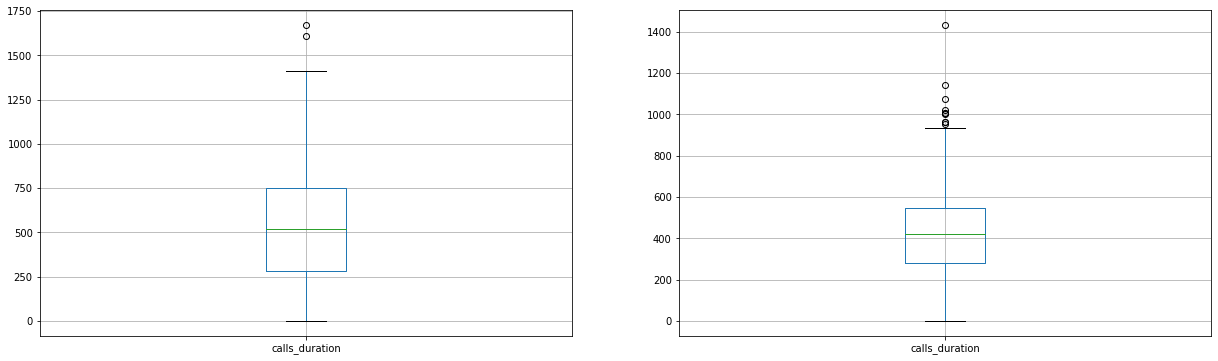

In [43]:
print('СРАВНЕНИЕ ТАРИФА ULTRA И SMART')
fig = plt.figure(figsize = (21,6))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra'].boxplot('calls_duration', ax = plt.subplot(1,2,1))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart'].boxplot('calls_duration', ax = plt.subplot(1,2,2));

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,417.935,190.314,0.000,15.280,282.000,422.000,545.000,872.720,1435.000,36219.316
ultra,985.000,526.623,317.606,0.000,0.000,284.000,518.000,752.000,1291.120,1673.000,100873.633


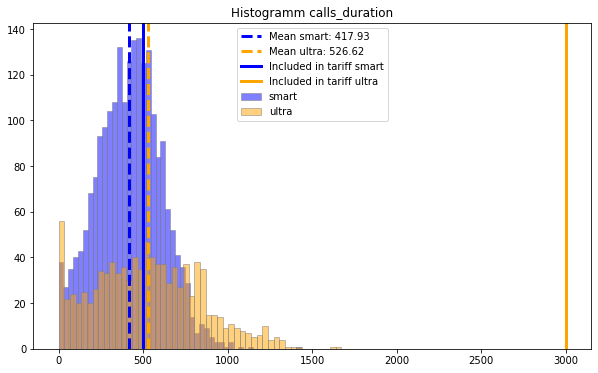

In [44]:
hist_maker_and_table(df_cmiu_pivot,'calls_duration',500,3000)

- Пользователи тарифа Смарт в среднем в месяц тратят меньше минут разговора, чем пользователи тарифа Ультра.
- На тарифе Смарт пользователи часто не укладываются в лимиты и доплачивают за звонки.
- Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000.

СРАВНЕНИЕ ТАРИФА ULTRA И SMART


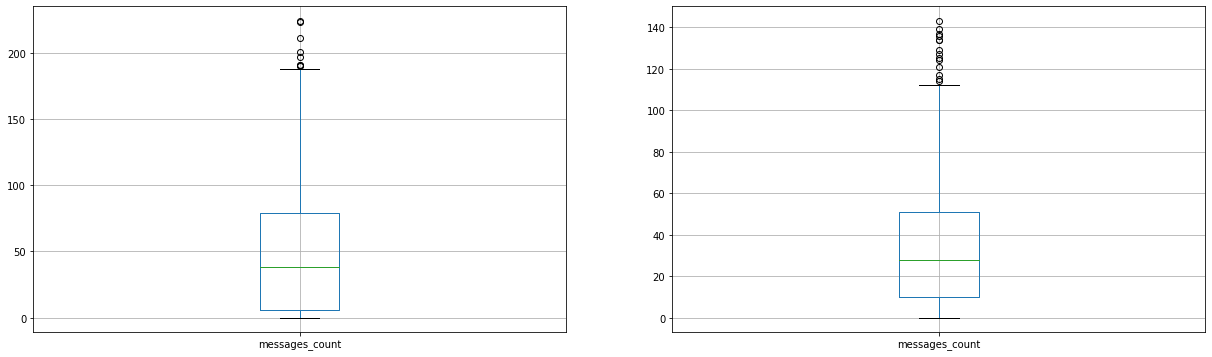

In [45]:
print('СРАВНЕНИЕ ТАРИФА ULTRA И SMART')
fig = plt.figure(figsize = (21,6))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra'].boxplot('messages_count', ax = plt.subplot(1,2,1))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart'].boxplot('messages_count', ax = plt.subplot(1,2,2));

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,33.384,28.228,0.000,0.000,10.000,28.000,51.000,108.000,143.000,796.813
ultra,985.000,49.363,47.804,0.000,0.000,6.000,38.000,79.000,183.320,224.000,2285.266


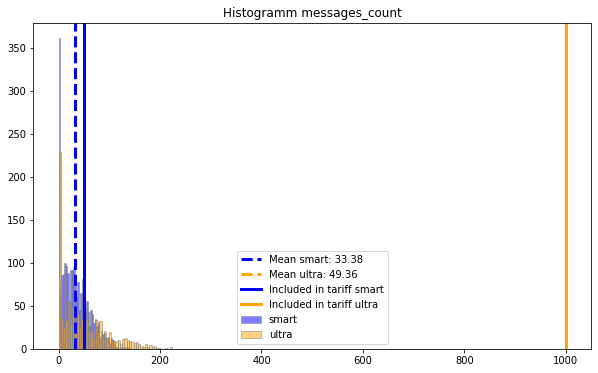

In [46]:
hist_maker_and_table(df_cmiu_pivot,'messages_count',50,1000)

- Пользователи тарифа Смарт в среднем в месяц отправляют меньше сообщений, чем пользователи тарифа Ультра.
- На тарифе Смарт пользователи часто не укладываются в лимиты и доплачивают за сообщения.
- Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда   укладываются в установленные лимиты. Максимальное число отправленных сообщений в месяц значительно меньше заложенных в него 1000.

СРАВНЕНИЕ ТАРИФА ULTRA И SMART


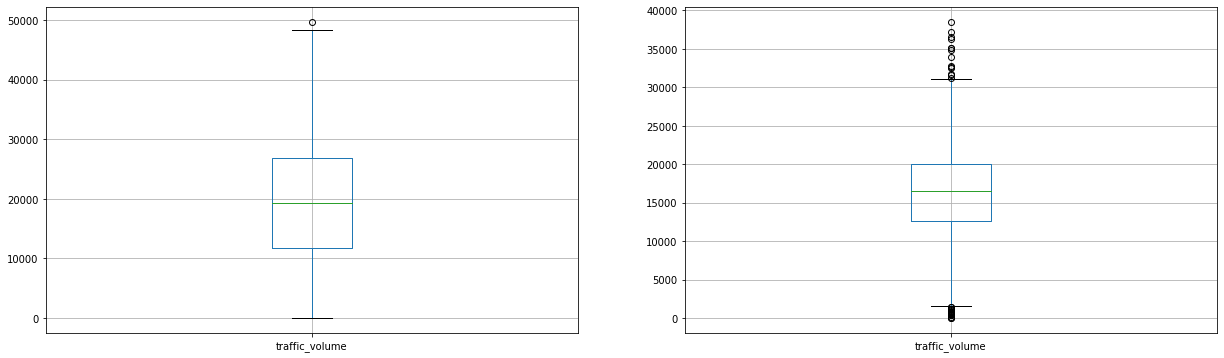

In [47]:
print('СРАВНЕНИЕ ТАРИФА ULTRA И SMART')
fig = plt.figure(figsize = (21,6))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra'].boxplot('traffic_volume', ax = plt.subplot(1,2,1))
df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart'].boxplot('traffic_volume', ax = plt.subplot(1,2,2));

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,16208.387,5870.477,0.000,1496.038,12643.010,16506.840,20042.930,29693.696,38552.450,34462496.463
ultra,985.000,19468.805,10087.171,0.000,0.000,11770.260,19308.010,26837.690,43005.964,49745.690,101751013.783


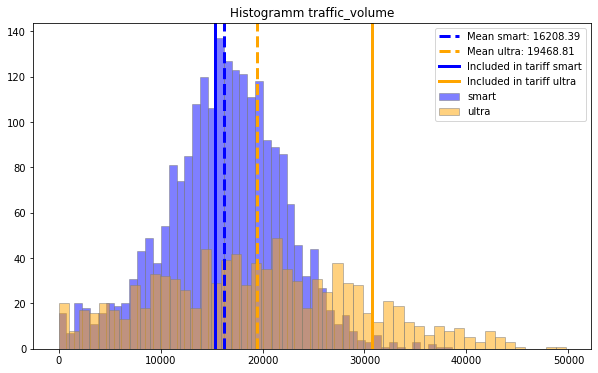

In [48]:
hist_maker_and_table(df_cmiu_pivot,'traffic_volume',15360,30720)

- Пользователи тарифа Смарт в среднем в месяц используют меньше Мб интернет-тарфика, чем пользователи тарифа Ультра.
- На тарифе Смарт пользователи чаще не укладываются в лимиты и доплачивают за интернет-тарфик, чем пользователи тарифа Ультра.
- Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа чаще укладываются в установленные лимиты. Максимальное число использованного интернет-трафика в месяц незначительно больше заложенных в него 30 Гб (30720 Мб).

Чтобы посмотреть поведение клиентов посчитаем помесячную сумму исследуемых параметров для всех пользователей:

In [49]:
df_month_sum = (df_cmiu_pivot
                .pivot_table(index=['tariff', 'month'],
                             values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill'],
                             aggfunc=sum))

df_month_sum = df_month_sum.reset_index(level='month')
display(df_month_sum)

,month,calls_count,calls_duration,messages_count,total_bill,traffic_volume
tariff,,,,,,
smart,2018-01-01,941.000,6931.000,620.000,24525.000,289466.400
smart,2018-02-01,2331.000,17324.000,1397.000,48001.000,672629.150
smart,2018-03-01,4183.000,30034.000,2453.000,89676.000,1163020.250
smart,2018-04-01,5747.000,41119.000,3443.000,107866.000,1507764.230
smart,2018-05-01,7789.000,54618.000,4762.000,168849.000,2228530.990
smart,2018-06-01,9110.000,64885.000,5478.000,197459.000,2590322.270
smart,2018-07-01,11402.000,82079.000,6784.000,246014.000,3164373.220
smart,2018-08-01,13860.000,99045.000,7905.000,310340.000,3903519.220
smart,2018-09-01,15482.000,111439.000,8746.000,324986.000,4238930.490


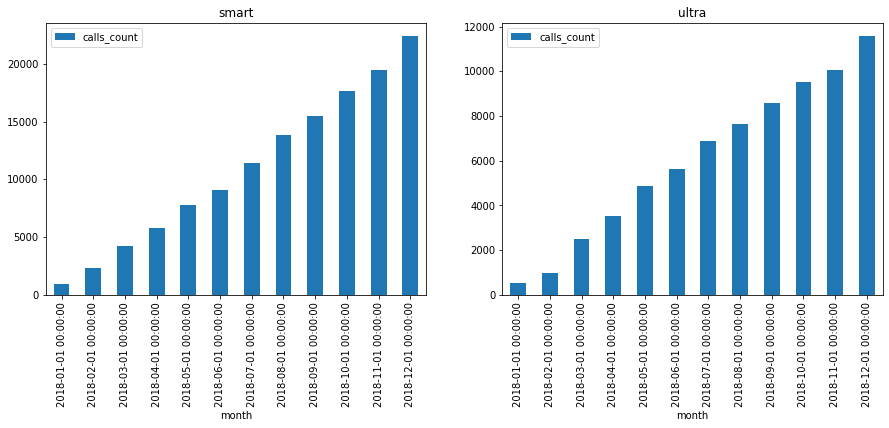

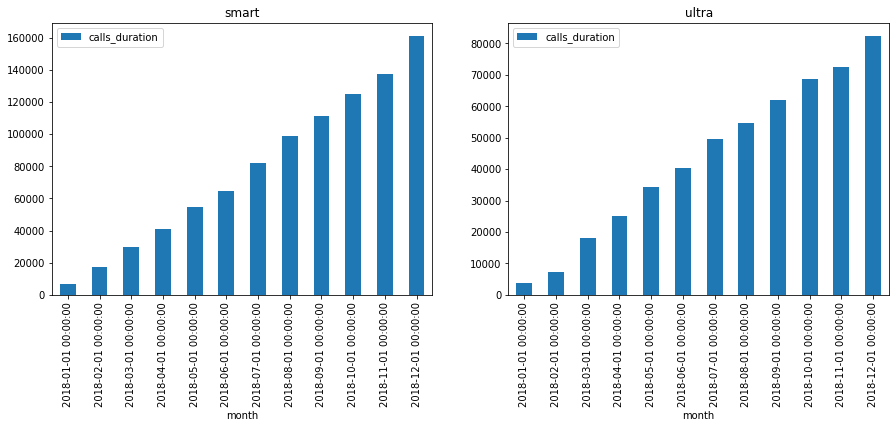

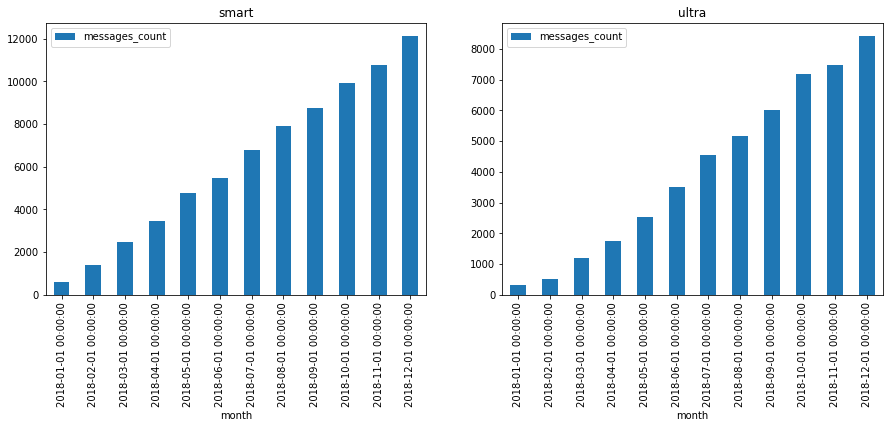

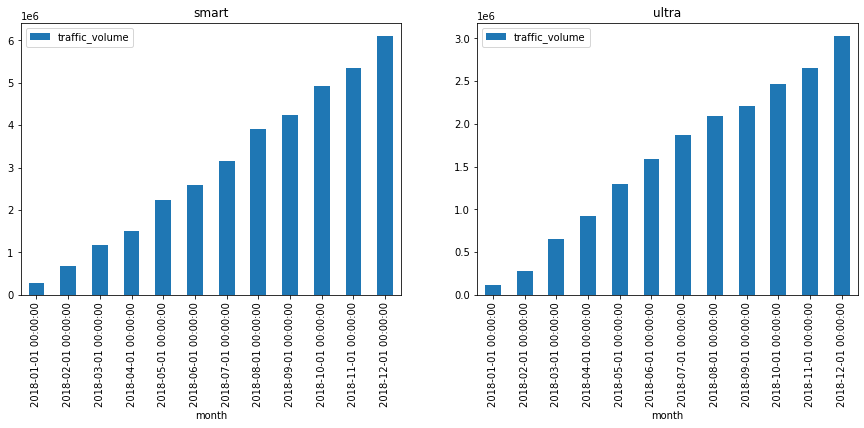

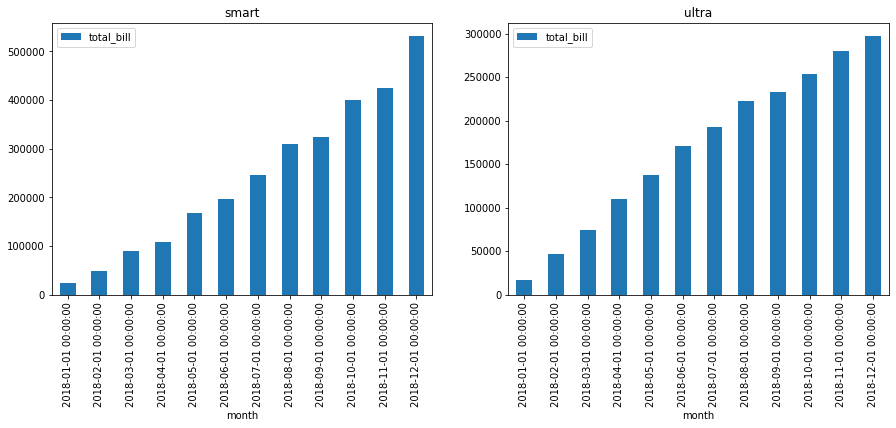

In [50]:
# для большей наглядности построим столбчатые графики распределения суммарных значений параметров в течение года:

for dms_col_name in ['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill']:
    fig, axs = plt.subplots(1,2)
    df_month_sum[df_month_sum.index=='smart'].plot(x='month', y=dms_col_name, kind='bar', title='smart', ax=axs[0], figsize=(15, 5))
    df_month_sum[df_month_sum.index=='ultra'].plot(x='month', y=dms_col_name, kind='bar', title='ultra', ax=axs[1], figsize=(15, 5))

Как видно на гистограммах все параметры (количество звонков, продолжительность разговоров, количество сообщений, объем израсходованного интернет-трафика и ежемесячный счет) растут от января к декабрю, причем растут  линейно и не зависимо от того, какой тариф используют клиенты.

Если говорить об абсолютных показателях, то следует отметить, что в исследуемой выборке число пользователей тарифа Смарт более чем в 2 раза превышает число пользователей тарифа Ультра.

In [51]:
print(df_cmiu_pivot[df_cmiu_pivot['tariff']=='smart']['tariff'].count())
print('Количество пользователей тарифа Смарт:', df_users[df_users['tariff']=='smart']['tariff'].count())

2229
Количество пользователей тарифа Смарт: 351


In [52]:
print(df_cmiu_pivot[df_cmiu_pivot['tariff']=='ultra']['tariff'].count())
print('Количество пользователей тарифа Ультра:',df_users[df_users['tariff']=='ultra']['tariff'].count())

985
Количество пользователей тарифа Ультра: 149


## Гипотезы

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются¶

Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **равны**, то есть средние значения равны.

Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **не равны**, то есть средние значения не равны.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%.

In [53]:
sample_1 = df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'ultra']['total_bill'] 
sample_2 = df_cmiu_pivot[df_cmiu_pivot['tariff'] == 'smart']['total_bill'] 
results = st.ttest_ind(sample_1, sample_2)

# уровень значимости 5%
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  1.4229814360764067e-160
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, то есть маловероятна случайность результатов теста гипотезы.


### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;

Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Альтернативная гипотеза у нас двусторонняя, так как средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.

In [54]:
msc_df = df_cmiu_pivot[df_cmiu_pivot['city'] == 'Москва']['total_bill'] 
not_msc_df = df_cmiu_pivot[df_cmiu_pivot['city'] != 'Москва']['total_bill'] 
results = st.ttest_ind(msc_df, not_msc_df)

# уровень значимости 5%
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5440152911670224
Опровергнуть нулевую гипотезу нельзя


р-уровень значимости составил ,более 52 %, что значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

## Выводы

Сделав предварительный анализ тарифов на небольшой выборке пользователей можем сделать следующие выводы:

- Средние чеки тарифов Смарт и Ультра значимо различаются. В среднем пользователи тарифа Ультра платят больше;
- Так как средняя выручка по Москве и другим регионам значимо не различаются, то рекламную компанию можно устроить по всей территории распространения сети;
- На тарифе Смарт пользователи чаще не укладываются в лимиты и доплачивают за услуги связи, чем пользователи тарифа Ультра.
- Пики нулевых значений на гистограммах с длительностью звонков и интернет-сессиях связаны с пропущенными звонками и наличием фактов неиспользования мобильного интернета (обозначены в таблицах 0). Кроме того, гистограмма с количеством сообщений тоже свидетельствует о том, что не все пользователи тарифов используют текстовые сообщения.
Данная информация может быть использована в дальнейшем для принятий решений об изменениях условий действующих тарифов или при создании нового, учитывающего либо предпочтения клиентов, либо возможности для получения дополнительной прибыли сотового оператора.
- Количество пользователей тарифа Ультра, которые в среднем тратят на услуги связи больше, более чем в 2 раза меньше количества пользователей тарифа Смарт в представленной выборке. Если такое распределение пользователей характерно и для генеральной совокупности, то коммерческой службе имеет смысл учесть данную информацию при разаработке маркетинговых стратегий.

Таким образом, тариф Ультра выгоднее для компании "Мегалайн", так как в среднем пользователи тарифа Ультра платят больше.